In [1]:
from one import model
from one import algorithm
from one import analysis
from one import draw

In [2]:
import uuid
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm, trange

In [72]:
m = model.Ising(30)
f = algorithm.Anneal(m)
uid = uuid.uuid1().hex

100%|██████████| 100/100 [00:05<00:00, 18.57it/s]


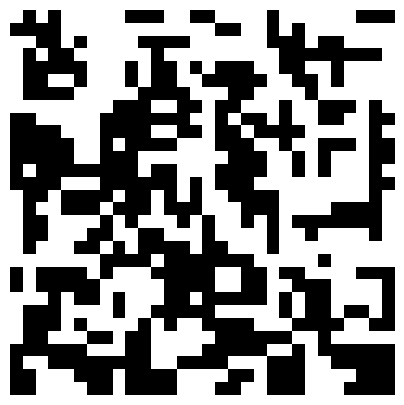

In [74]:
plt.figure(figsize=(5, 5))
f.equil_sample(2.7,100,uid=uid)
plt.imshow(f.model.spin, cmap='gray')
plt.axis('off')
plt.show()

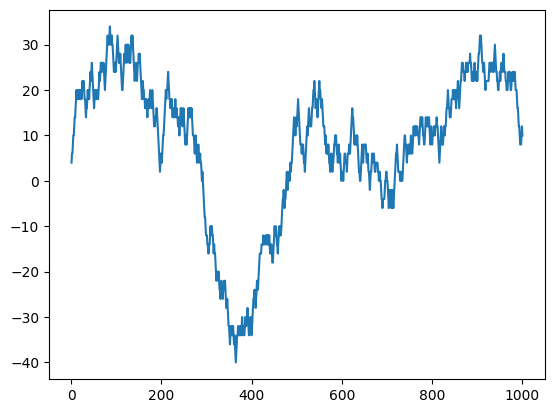

In [76]:
p = draw.Plot(f)
p.curve(uid, 'm')

In [ ]:
from matplotlib import animation
from matplotlib.animation import HTMLWriter
%matplotlib widget

fig, ax = plt.subplots(figsize=(5, 5))
spin_lst = f.iter_data.loc[uid, 'spin'].tolist()


def init():
    ax.imshow(np.zeros_like(spin_lst[0]), cmap='gray')
    ax.axis('off')
    return ax


def update(iter):
    ax.clear()
    ax.imshow(spin_lst[iter], cmap='gray')
    ax.set_title('iter: {}'.format(iter))
    ax.axis('off')
    return ax

# interval = int(5000/len(spin_lst))
ani = animation.FuncAnimation(fig=fig,
                              func=update,
                              frames=range(len(spin_lst)))
mywriter = HTMLWriter(fps=60)
# ani.save('myAnimation.html',writer=mywriter)
# plt.close()